# Simplicity and Depression - K means 

# Objective:
To determine if there is a relationship between higher levels of black and white thinking and higher levels of self-reported 
depression in psychiatric patients hospitalized for depression.Also apply K means clustering and assign groups for model prediction

# Context:
It is common for people who tend to think of their reality as a series of black and white events to suffer from depression. 
Psybersquare, Inc. describes a few examples of this way of thinking by saying that those who suffer from this way of thinking 
think that, "If things aren't 'perfect,' then they must be "horrible." If your child isn't "brilliant" then he must be 'stupid.' 
If you're not 'fascinating' then you must be 'boring.'" This can be a difficult way to live since those suffering from this way 
of thinking may never feel that their reality is “good enough”. 

# Data Sources:
The data used for this study is from the Ginzberg data frame which is based on psychiatric patients hospitalized for depression. 
Data is from the book Applied Regression Analysis and Generalized Linear Models, Second Edition by Fox, J. (2008). The dataset 
includes three variables - simplicity (black and white thinking), fatalism, and depression. The data also includes these 
variables each adjusted by regression for other variables thought to influence depression. For the purposes of this study, we 
will use the non-adjusted values. Ginzberg Dataset on Depression display_output(Ginzberg, out_type) simplicity fatalism 
depression adjsimp adjfatal adjdep 

Here, "Black and white thinking" is referred as "Simplicity"

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd

In [3]:
# reading the CSV file into pandas dataframe
mydata = pd.read_csv("Depression.csv")

In [4]:
mydata.head()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [5]:
##Remove id since it is redundant
mydata.drop('id', axis=1, inplace=True)

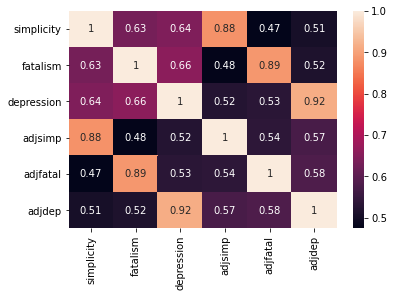

In [6]:
corr = mydata.corr()
sns.heatmap(corr, annot = True)

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   simplicity  82 non-null     float64
 1   fatalism    82 non-null     float64
 2   depression  82 non-null     float64
 3   adjsimp     82 non-null     float64
 4   adjfatal    82 non-null     float64
 5   adjdep      82 non-null     float64
dtypes: float64(6)
memory usage: 4.0 KB


In [8]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
simplicity,82.0,1.000000,0.500000,0.25068,0.656282,0.882665,1.26940,2.85408
fatalism,82.0,1.000000,0.500001,-0.05837,0.563010,0.977270,1.39152,2.22003
depression,82.0,1.000001,0.500000,0.46953,0.566410,0.824750,1.37373,2.24565
adjsimp,82.0,1.000000,0.499999,0.23569,0.697958,0.968490,1.20179,2.94977
adjfatal,82.0,1.000000,0.500000,0.03012,0.731598,0.924290,1.29912,2.24931
adjdep,82.0,1.000000,0.500000,0.23454,0.596565,0.967845,1.26175,2.78763


In [9]:
mydata.drop(columns = {'simplicity', 'fatalism','depression'}, inplace=True)

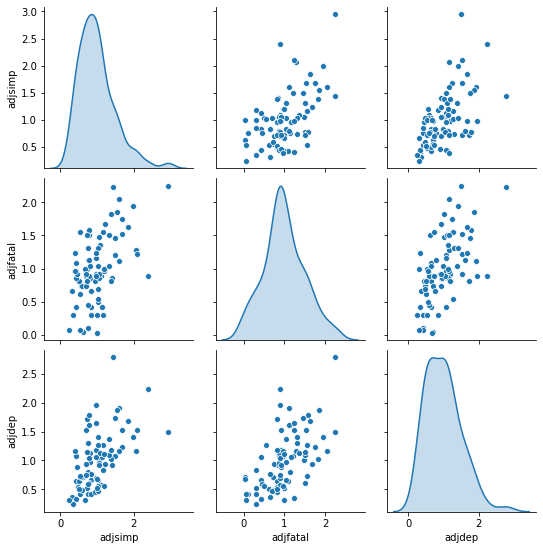

In [10]:
import seaborn as sns
sns.pairplot(mydata, diag_kind='kde') 

In [11]:
##Based on the kde plots, we can work with 2 or 3 clusters

In [12]:
##Scale the data
from scipy.stats import zscore

mydata_z = mydata.apply(zscore)


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

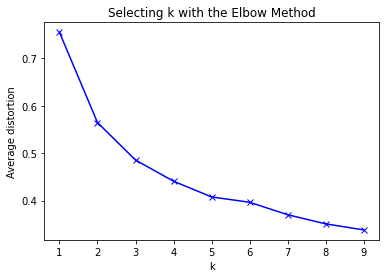

In [13]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mydata)
    prediction=model.predict(mydata)
    meanDistortions.append(sum(np.min(cdist(mydata, model.cluster_centers_, 'euclidean'), axis=1)) / mydata
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [14]:
#Set the value of k=6
kmeans = KMeans(n_clusters=6, n_init = 15, random_state=2345)

In [15]:
kmeans.fit(mydata_z)

KMeans(n_clusters=6, n_init=15, random_state=2345)

In [16]:
centroids = kmeans.cluster_centers_

In [17]:
centroids

array([[ 0.07789966, -0.29234334,  0.56492518],
       [-0.57436601, -1.35119281, -1.00630038],
       [ 1.83513691,  1.16782514,  1.16703471],
       [ 0.14313589,  0.87891791,  0.44896126],
       [ 0.88662427,  2.49264672,  3.59726278],
       [-0.64114511, -0.08540729, -0.586397  ]])

In [18]:
#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(mydata_z) )

In [19]:
print(centroid_df)

    adjsimp  adjfatal    adjdep
0  0.077900 -0.292343  0.564925
1 -0.574366 -1.351193 -1.006300
2  1.835137  1.167825  1.167035
3  0.143136  0.878918  0.448961
4  0.886624  2.492647  3.597263
5 -0.641145 -0.085407 -0.586397


In [20]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [21]:
# Joining the label dataframe with the data frame.
df_labeled = mydata.join(df_labels)

In [22]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis

,adjsimp,adjfatal,adjdep,labels
0,0.75934,0.10673,0.41865,1
1,0.72717,0.99915,0.51688,5
2,0.62176,0.03811,0.70699,1
3,0.83522,0.42218,0.65639,1
4,0.47697,0.81423,0.53518,5
...,...,...,...,...
77,0.72117,1.50039,1.14913,3
78,1.59752,2.05016,1.16443,2
79,2.39515,0.88910,2.24452,2
80,1.31493,1.04058,1.37153,0


In [23]:
df_labeled['labels'].value_counts()  

5    26
1    16
0    14
3    13
2    12
4     1
Name: labels, dtype: int64

In [24]:
# Let us try with K = 3 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

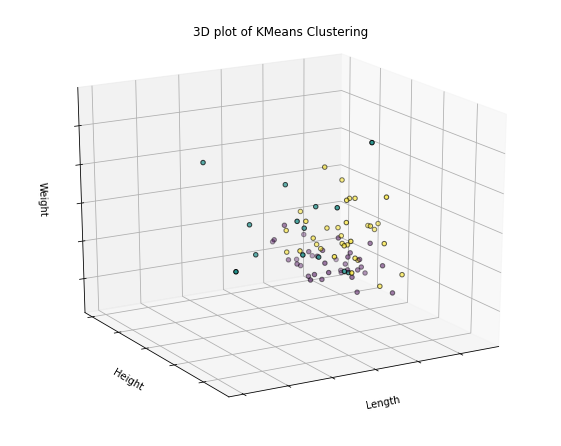

In [25]:

## 3D plots of clusters

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(3)
k3_model.fit(mydata_z)
labels = k3_model.labels_
ax.scatter(mydata_z.iloc[:, 0], mydata_z.iloc[:, 1], mydata_z.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

In [26]:
# Let us try with K = 3 (to demonstrate the 3d plot)
final_model=KMeans(3)
final_model.fit(mydata)
prediction=final_model.predict(mydata)

#Append the prediction 
mydata["GROUP"] = prediction
print("Groups Assigned : \n")
mydata[["adjdep", "GROUP"]]

Groups Assigned : 



,adjdep,GROUP
0,0.41865,2
1,0.51688,2
2,0.70699,2
3,0.65639,2
4,0.53518,2
...,...,...
77,1.14913,1
78,1.16443,0
79,2.24452,0
80,1.37153,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B583047670>,
      dtype=object)

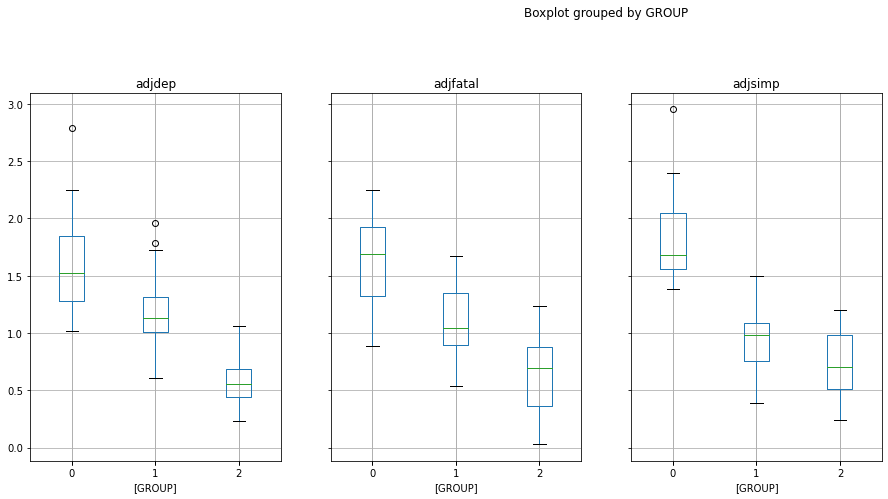

In [27]:
mydata.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))

In [28]:
#To determine if a relationship exists between black and white thinking(simplicity) and depression. 
mydata['adjsimp'].corr(mydata['adjdep'])

0.5726929734870994

The correlation coefficient above indicates that the relationship between black and white thinking and depression can be 
considered moderate and positive. This means that we can see a clear relationship between black and white thinking and 
Depression, although the relationship is not perfect. The fact that the correlation coefficient is positive, indicates that 
higher levels of black and white thinking is associated with higher levels of depression

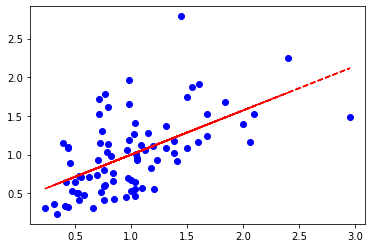

In [29]:
%matplotlib inline
import pandas as pd
plt.plot(mydata['adjsimp'], mydata['adjdep'], 'bo')
z = np.polyfit(mydata['adjsimp'], mydata['adjdep'],1)
p = np.poly1d(z)
plt.plot(mydata['adjsimp'], p(mydata['adjsimp']), "r--")

#geom_point()

In [30]:
# As you can see from the above graphic, although the data does not form a perfectly straight line, it does fall in a way that 
#indicates a positive relationship. Therefore, we can once again conclude that there is a relationship between black and white 
#thinking and depression. It is important to note, however, that correlation does not in any way indicate causality and is merely
#indicative of a relationship between the two.